# 영상 데이터 예측 by 전이학습 template

# 데이터 준비

In [1]:
!wget https://github.com/dhrim/deep_learning_data/raw/main/cat_face_keypoint.zip

--2021-12-27 04:49:52--  https://github.com/dhrim/deep_learning_data/raw/main/cat_face_keypoint.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/deep_learning_data/main/cat_face_keypoint.zip [following]
--2021-12-27 04:49:52--  https://raw.githubusercontent.com/dhrim/deep_learning_data/main/cat_face_keypoint.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81178786 (77M) [application/zip]
Saving to: ‘cat_face_keypoint.zip’

cat_face_keypoint.z 100%[===================>]  77.42M   319MB/s    in 0.2s    

2021-12-27 04:49:52 (319 MB/s) - ‘cat_face_keypoint.zip’ saved [81178786/81178786

In [2]:
!unzip cat_face_keypoint.zip

Archive:  cat_face_keypoint.zip
  inflating: cat_image_and_keypoint.npy  


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

https://www.kaggle.com/crawford/cat-dataset 의
고양이 영상 파일과 레이블링 데이터를 읽고 numpy 파일로 저장해 두었다. <br>


In [ ]:
numpy_data = np.load('cat_image_and_keypoint.npy', allow_pickle=True)
dic_data = numpy_data.item()
x = np.array(dic_data.get('imgs'))
y = np.array(dic_data.get('lmks'))

In [ ]:
print(x.shape)
print(y.shape)

(300, 224, 224, 3)
(300, 18)


## 이미지 보기

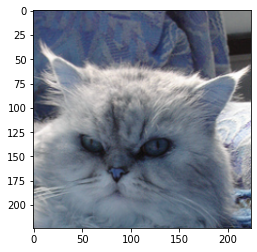

[ 59 135 128 137  85 177  32  93  19  48  50  64 172  72 205  67 188 106]


In [ ]:
plt.imshow(x[0])
plt.show()
print(y[0])

## 키 포인트 보기

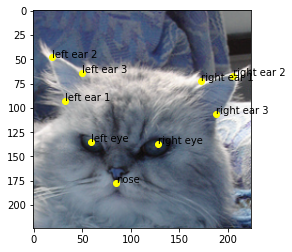

In [ ]:
target_x = x[0]
target_y = y[0]

plt.imshow(target_x)

plt.scatter(target_y[0], target_y[1], color='yellow')
plt.text(target_y[0], target_y[1], 'left eye')
plt.scatter(target_y[2], target_y[3], color='yellow')
plt.text(target_y[2], target_y[3], 'right eye')
plt.scatter(target_y[4], target_y[5], color='yellow')
plt.text(target_y[4], target_y[5], 'nose')
plt.scatter(target_y[6], target_y[7], color='yellow')
plt.text(target_y[6], target_y[7], 'left ear 1')
plt.scatter(target_y[8], target_y[9], color='yellow')
plt.text(target_y[8], target_y[9], 'left ear 2')
plt.scatter(target_y[10], target_y[11], color='yellow')
plt.text(target_y[10], target_y[11], 'left ear 3')
plt.scatter(target_y[12], target_y[13], color='yellow')
plt.text(target_y[12], target_y[13], 'right ear 1')
plt.scatter(target_y[14], target_y[15], color='yellow')
plt.text(target_y[14], target_y[15], 'right ear 2')
plt.scatter(target_y[16], target_y[17], color='yellow')
plt.text(target_y[16], target_y[17], 'right ear 3')

plt.show()

## 코만 추리기

코에 해당하는 인덱스 4,5만 추림

In [ ]:
y = y[:,4:6]

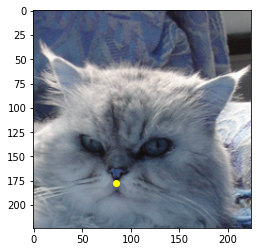

In [ ]:
target_x = x[0]
target_y = y[0]

plt.imshow(target_x)
plt.scatter(target_y[0], target_y[1], color='yellow')
plt.show()

## normalization

In [ ]:
x = x / 255.

## 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, shuffle=True)

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(240, 224, 224, 3)
(240, 2)
(60, 224, 224, 3)
(60, 2)


In [ ]:
print(train_y[:10])

[[116 199]
 [119 205]
 [124 205]
 [103 187]
 [113 206]
 [128 187]
 [126 197]
 [ 77 158]
 [137 205]
 [117 200]]


## Template

In [ ]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import models
from tensorflow.keras import Model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import mobilenet_v2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

conv_layers = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2))

model.summary()

model.compile(optimizer='Adam', loss='mse')


history = model.fit(train_x, train_y, epochs=100, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


9420800/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 128)               8028288   
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                           

## 결과 보기

In [ ]:
predicted = model.predict(test_x[:16])

In [ ]:
print(predicted.shape)
print(predicted)

(16, 2)
[[161.1171   196.51791 ]
 [ 92.089714 183.6     ]
 [132.07292  199.85976 ]
 [113.775406 178.16762 ]
 [ 60.107044 166.11082 ]
 [104.55112  184.61404 ]
 [120.66559  190.8775  ]
 [107.90797  193.62396 ]
 [122.86899  205.7203  ]
 [ 85.76003  188.44553 ]
 [ 97.37501  186.36334 ]
 [121.72283  188.53728 ]
 [ 83.28105  195.02171 ]
 [125.895386 199.46458 ]
 [ 80.105446 162.43901 ]
 [108.59442  193.89308 ]]


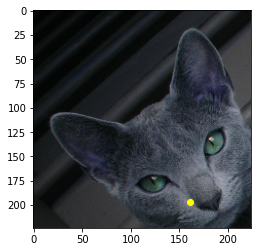

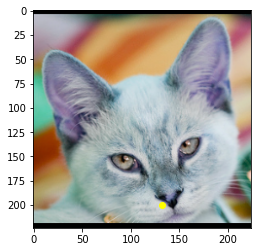

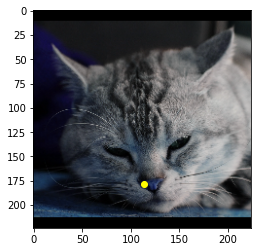

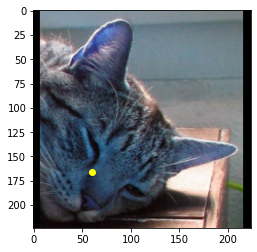

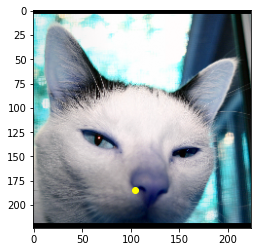

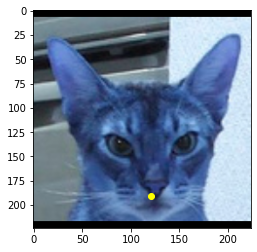

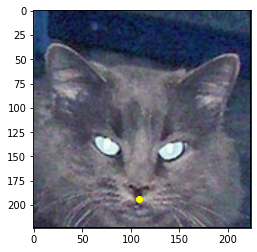

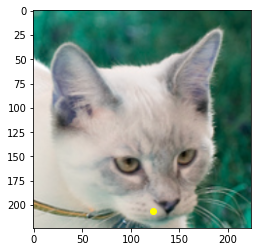

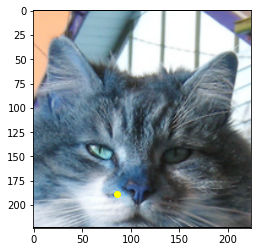

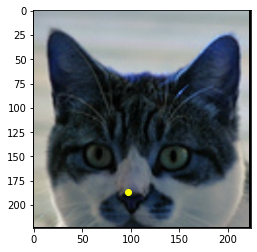

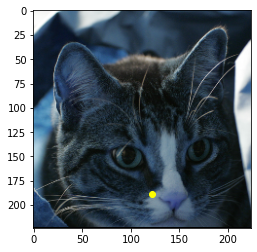

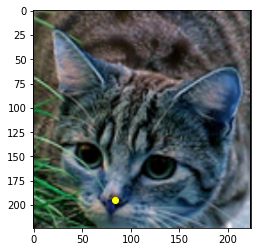

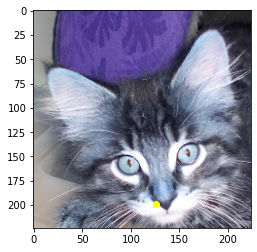

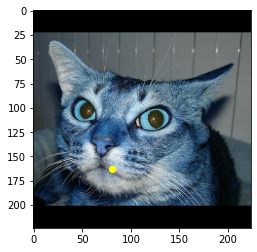

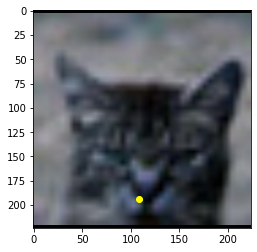

In [ ]:
for i in range(16):
  plt.imshow(test_x[i])
  plt.scatter(predicted[i][0], predicted[i][1], color='yellow')
  plt.show()

# 오른쪽 눈 위치 예측하기

In [ ]:
numpy_data = np.load('cat_image_and_keypoint.npy', allow_pickle=True)
dic_data = numpy_data.item()
x = np.array(dic_data.get('imgs'))
y = np.array(dic_data.get('lmks'))

## 오른쪽눈 만 추리기

코에 해당하는 인덱스 4,5만 추림

In [ ]:
y = y[:,2:4]

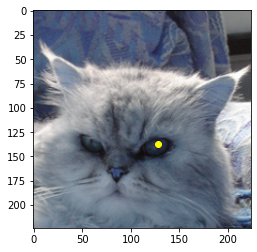

In [ ]:
target_x = x[0]
target_y = y[0]

plt.imshow(target_x)
plt.scatter(target_y[0], target_y[1], color='yellow')
plt.show()

## normalization

In [ ]:
x = x / 255.

## 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, shuffle=True)

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(240, 224, 224, 3)
(240, 2)
(60, 224, 224, 3)
(60, 2)


In [ ]:
print(train_y[:10])

[[154 136]
 [145 154]
 [171 142]
 [150 129]
 [152 117]
 [150 148]
 [169 132]
 [132 120]
 [172 150]
 [163 140]]


## 학습

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_1 (Flatten)         (None, 62720)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               8028288   
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 10,287,042
Trainable params: 8,028,802
N

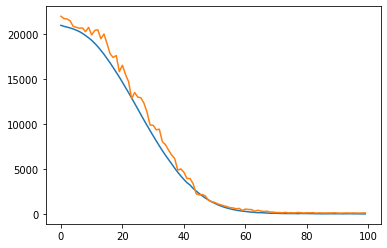

In [ ]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import models
from tensorflow.keras import Model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import mobilenet_v2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

conv_layers = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

right_eye_model = models.Sequential()

right_eye_model.add(conv_layers)
right_eye_model.add(Flatten())
right_eye_model.add(Dense(128, activation='relu'))
right_eye_model.add(BatchNormalization())
right_eye_model.add(Dense(2))

right_eye_model.summary()

right_eye_model.compile(optimizer='Adam', loss='mse')


history = right_eye_model.fit(train_x, train_y, epochs=100, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


## 결과 보기

In [ ]:
predicted = right_eye_model.predict(test_x[:16])

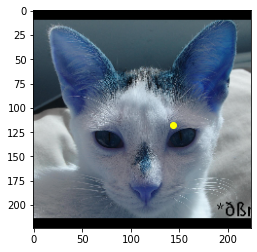

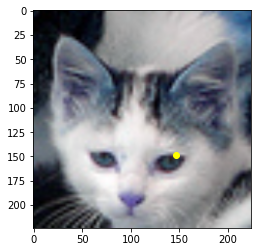

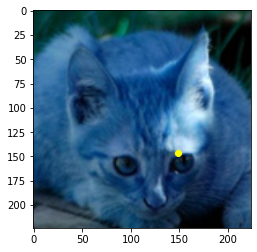

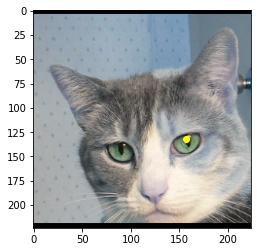

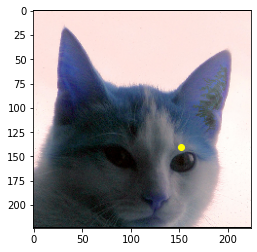

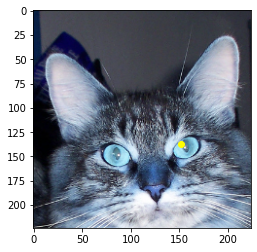

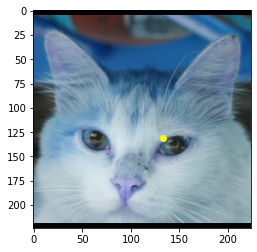

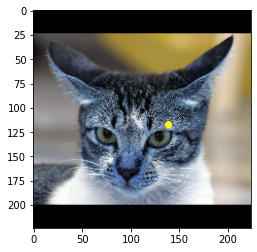

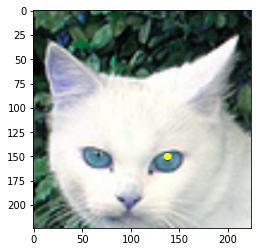

In [ ]:
for i in range(16):
  plt.imshow(test_x[i])
  plt.scatter(predicted[i][0], predicted[i][1], color='yellow')
  plt.show()

# 오른쪽 눈 위치 예측하기 - y 값 normalization

In [4]:
numpy_data = np.load('cat_image_and_keypoint.npy', allow_pickle=True)
dic_data = numpy_data.item()
raw_x = np.array(dic_data.get('imgs'))
raw_y = np.array(dic_data.get('lmks'))

## 오른쪽눈 만 추리기

코에 해당하는 인덱스 4,5만 추림

In [5]:
x = raw_x
y = raw_y[:,2:4]

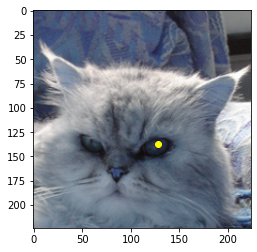

In [6]:
target_x = x[0]
target_y = y[0]

plt.imshow(target_x)
plt.scatter(target_y[0], target_y[1], color='yellow')
plt.show()

## normalization

In [7]:
x = x / 255.

In [8]:
y = y / 255.

## 데이터 분리

In [9]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, shuffle=True)

In [10]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(240, 224, 224, 3)
(240, 2)
(60, 224, 224, 3)
(60, 2)


In [11]:
print(train_y[:10])

[[0.50588235 0.52156863]
 [0.5372549  0.45882353]
 [0.53333333 0.58823529]
 [0.58039216 0.56862745]
 [0.56862745 0.5254902 ]
 [0.46666667 0.60784314]
 [0.55294118 0.50980392]
 [0.59607843 0.57254902]
 [0.62745098 0.58431373]
 [0.56862745 0.52156863]]


## 학습

9420800/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 128)               8028288   
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                           

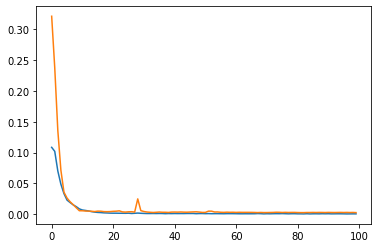

In [12]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import models
from tensorflow.keras import Model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import mobilenet_v2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

conv_layers = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

right_eye_model = models.Sequential()

right_eye_model.add(conv_layers)
right_eye_model.add(Flatten())
right_eye_model.add(Dense(128, activation='relu'))
right_eye_model.add(BatchNormalization())
right_eye_model.add(Dense(2, activation="sigmoid"))

right_eye_model.summary()

right_eye_model.compile(optimizer='Adam', loss='mse')


history = right_eye_model.fit(train_x, train_y, epochs=100, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


## 결과 보기

In [13]:
predicted = right_eye_model.predict(test_x[:16])

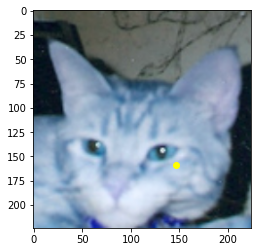

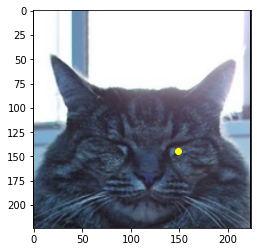

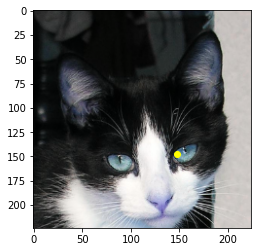

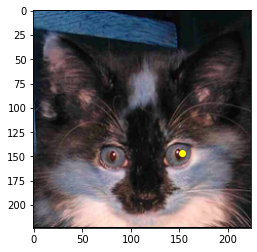

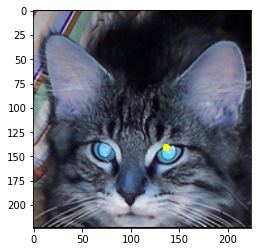

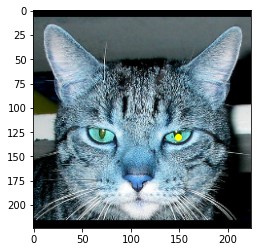

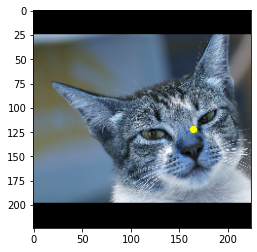

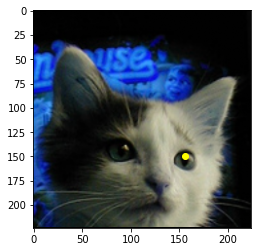

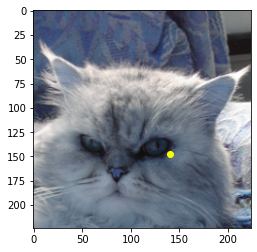

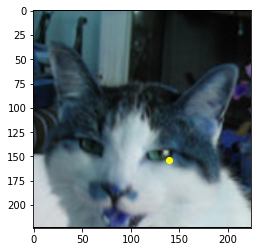

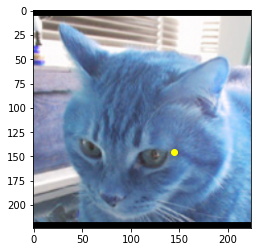

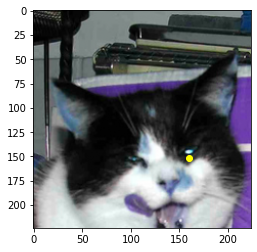

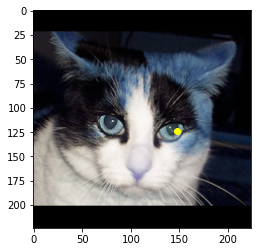

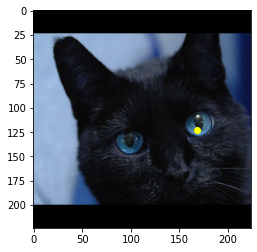

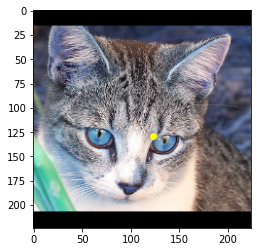

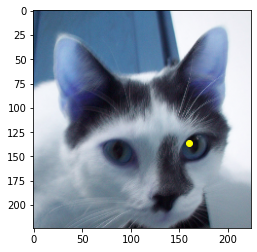

In [14]:
for i in range(16):
  plt.imshow(test_x[i])
  plt.scatter(int(predicted[i][0]*255), int(predicted[i][1]*255), color='yellow')
  plt.show()

# 양쪽눈 위치 예측하기


In [ ]:
numpy_data = np.load('cat_image_and_keypoint.npy', allow_pickle=True)
dic_data = numpy_data.item()
raw_x = np.array(dic_data.get('imgs'))
raw_y = np.array(dic_data.get('lmks'))

## 양쪽 눈 추리기

코에 해당하는 인덱스 4,5만 추림

In [15]:
x = raw_x
y = raw_y[:,0:4]

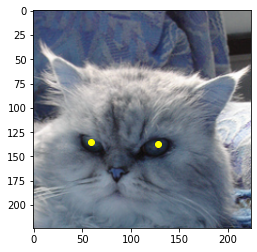

In [16]:
target_x = x[0]
target_y = y[0]

plt.imshow(target_x)
plt.scatter(target_y[0], target_y[1], color='yellow')
plt.scatter(target_y[2], target_y[3], color='yellow')
plt.show()

## normalization

In [17]:
x = x / 255.

In [18]:
y = y / 255.

## 데이터 분리

In [19]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, shuffle=True)

In [20]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(240, 224, 224, 3)
(240, 4)
(60, 224, 224, 3)
(60, 4)


In [21]:
print(train_y[:10])

[[0.30196078 0.54901961 0.52156863 0.61176471]
 [0.29411765 0.54117647 0.58039216 0.49019608]
 [0.17647059 0.45098039 0.39607843 0.70588235]
 [0.22352941 0.55686275 0.51372549 0.59215686]
 [0.54901961 0.7372549  0.74117647 0.54117647]
 [0.29803922 0.54117647 0.60392157 0.55686275]
 [0.34509804 0.58039216 0.60784314 0.57254902]
 [0.25098039 0.51764706 0.57647059 0.54117647]
 [0.23921569 0.5254902  0.53333333 0.57647059]
 [0.38431373 0.61960784 0.61960784 0.57254902]]


## 학습

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_1 (Flatten)         (None, 62720)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               8028288   
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 4)                 516       
                                                                 
Total params: 10,287,300
Trainable params: 8,029,060
N

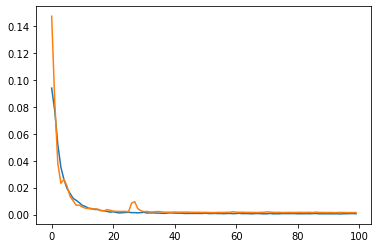

In [22]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import models
from tensorflow.keras import Model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import mobilenet_v2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

conv_layers = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

right_eye_model = models.Sequential()

right_eye_model.add(conv_layers)
right_eye_model.add(Flatten())
right_eye_model.add(Dense(128, activation='relu'))
right_eye_model.add(BatchNormalization())
right_eye_model.add(Dense(4, activation="sigmoid"))

right_eye_model.summary()

right_eye_model.compile(optimizer='Adam', loss='mse')


history = right_eye_model.fit(train_x, train_y, epochs=100, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


## 결과 보기

In [23]:
predicted = right_eye_model.predict(test_x[:16])

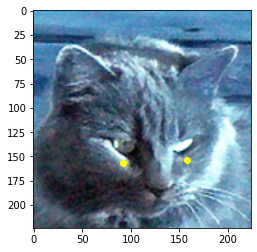

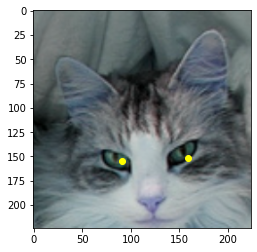

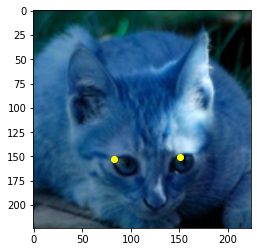

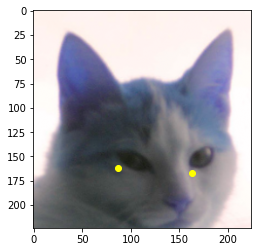

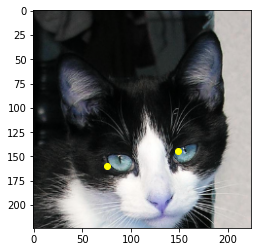

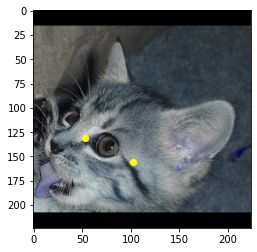

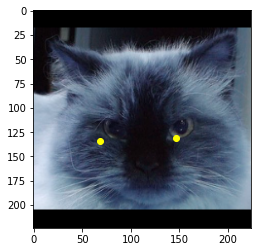

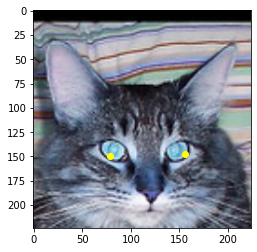

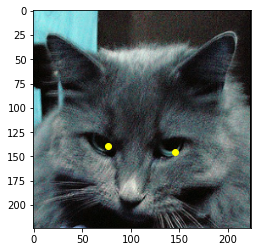

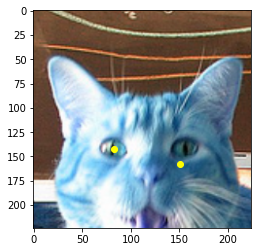

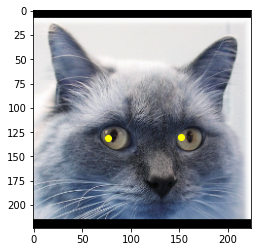

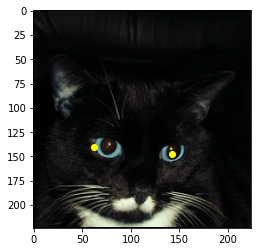

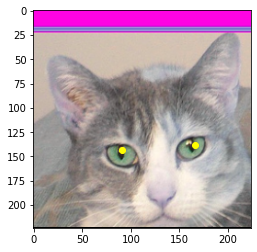

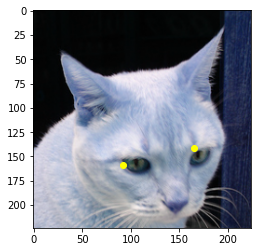

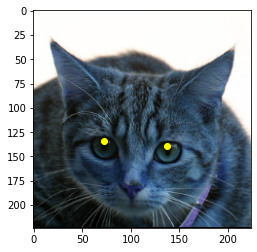

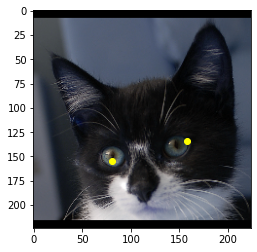

In [24]:
for i in range(16):
  plt.imshow(test_x[i])
  plt.scatter(int(predicted[i][0]*255), int(predicted[i][1]*255), color='yellow')
  plt.scatter(int(predicted[i][2]*255), int(predicted[i][3]*255), color='yellow')
  plt.show()